## 1. Getting started with **earthkit-maps**

Welcome to the **earthkit-maps** user guide!

**earthkit-maps** is the geospatial visualisation component of **earthkit**, a collection of Python libraries designed to simplify the process of accessing, processing and visualising weather and climate science data.

**earthkit** helps speed up science workflows by providing high-level tools which remove large amounts of the boilerplate code usually required for performing common tasks.

In this introduction, we are going to use **earthkit-maps** to quickly and conveniently visualise some data on a map. We are also going to make use of **earthkit-data** to speed up the process of accessing and inspecting some data in common weather and climate science formats (**netCDF** and **GRIB**).

If you haven't used **earthkit-data** before, you can still follow along with this example - it's very simple to use!

In [1]:
import earthkit.data
import earthkit.maps

We can use `earthkit.data.download_example_file()` to download some data from a library of sample data. For this first example, we will access some global temperature data from the [ERA5](https://www.ecmwf.int/en/forecasts/dataset/ecmwf-reanalysis-v5) reanalysis dataset, in GRIB format.

In [2]:
earthkit.data.download_example_file("era5-2m-temperature-dec-1993.grib")

This file can be easily opened with `earthkit.data.from_source()`.

In [3]:
data = earthkit.data.from_source("file", "era5-2m-temperature-dec-1993.grib")

### `earthkit.maps.quickplot`

We can inspect this data in a number of different ways, but perhaps the most straightforward way is to produce a quick automatic visualisation with the handy `earthkit.maps.quickplot` function:

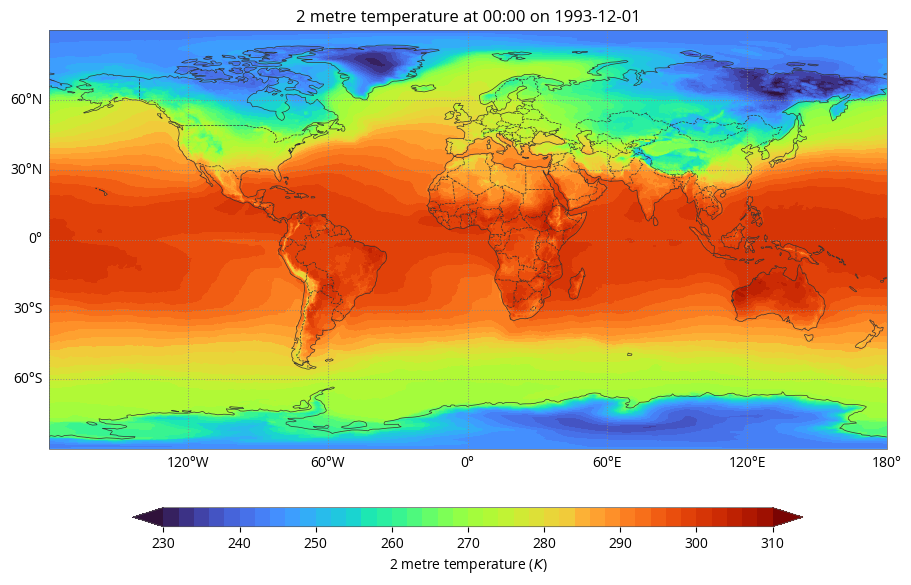

In [4]:
earthkit.maps.quickplot(data)

`earthkit.maps.quickplot` will attempt to find a suitable "style" (colour palette) for the particular data variable you are plotting. It will also attempt to add a legend and a title, formatted with metadata extracted from your source data. These features are *format-agnostic* - that is to say, they will work the same for different data formats - although note that these depend on your data meeting certain standards, such as CF-conventions for netCDF.

The `earthkit.maps.quickplot` feature can take some convenient arguments which help speed up taking a quick look at your data - for example, you can pass some desired units or a named domain. We'll explore these features in more detail in later examples, but here's a quick look at plotting temperature in celsius over a European domain:

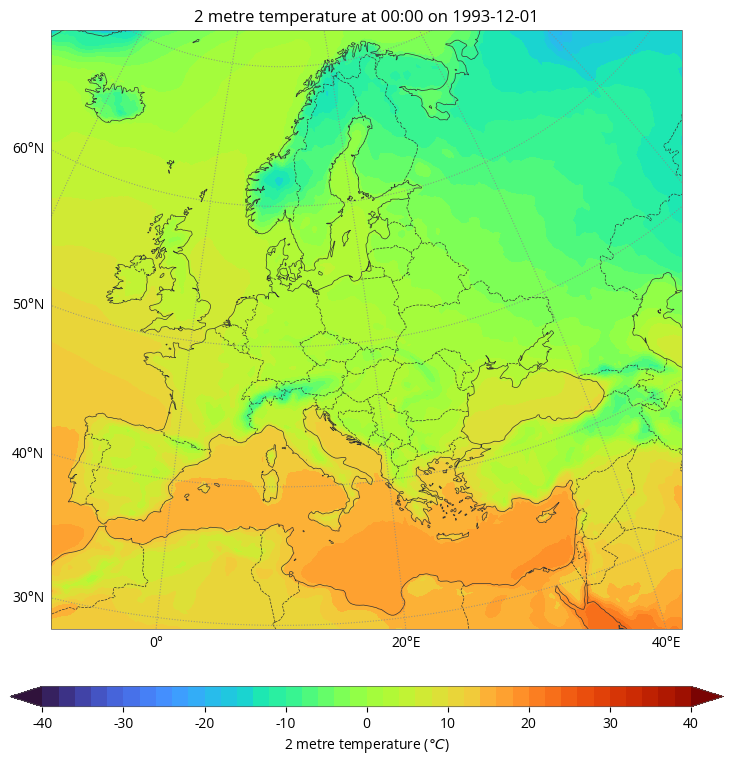

In [5]:
earthkit.maps.quickplot(data, units="celsius", domain="Europe")

### `Chart`s and `Style`s

In the above examples we used `earthkit.maps.quickplot` to produce a quick and convenient visualisation of our data - but what if we want to customise the plot more?

Let's re-visualise the same data as above with a few additional objectives:
 - Plot the entire global domain on a [Robinson](https://en.wikipedia.org/wiki/Robinson_projection) map projection, centred on the [International Date Line](https://en.wikipedia.org/wiki/International_Date_Line);
 - Make the coastlines thicker, make the borders use a solid line, and make the gridlines blue;
 - Make the title more informative than the automatic default;
 - Use a perceptually uniform colour palette ranging from -50 to +30 degrees celsius, in steps of 5.

To do all of this, we will need to use two handy classes - the `Chart` and the `Style`. A `Chart` represents the top-level container for all plot elements, whilst the `Style` represents a colour palette for visualising our data.

Let's start by creating a `Style` for our visualisation. It needs:
 - A perceptually-uniform colour scheme (for example, the ["inferno" colour scheme from matplotlib](https://matplotlib.org/stable/gallery/color/colormap_reference.html) - note that all named matplotlib colour schemes are compatible with **earthkit-maps**);
 - Levels ranging from -50 to +30 in steps of 5 (i.e. `range(-50, 31, 5)`);
 - Units of `"celsius"`;
 - For good measure, we can also extend the range of the palette to catch any values which are lower than -50 or greater than 30 - we do this with the argument `extend="both"`.

In [6]:
style = earthkit.maps.Style(
    colors="inferno",
    levels=range(-50, 31, 5),
    units="celsius",
    extend="both",
)

Now we have a style and some data, we need a `Chart` to plot it on. Remember, this chart needs to:
 - Be on a *Robinson* map projection centred on 180°E, for which we will use a handy [cartopy CRS object](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#robinson);
 - Use the `Style` we defined above;
 - Have thicker-than-usual coastlines (the default is 0.5), solid borders and blue gridlines;
 - Have an improved title, for which we can use metadata-detecting format keys in our title strings. The sample data we're using in this tutorial is a monthly average from the ERA5 dataset, so let's make that clear in the title, alongside the variable name and the month being shown.

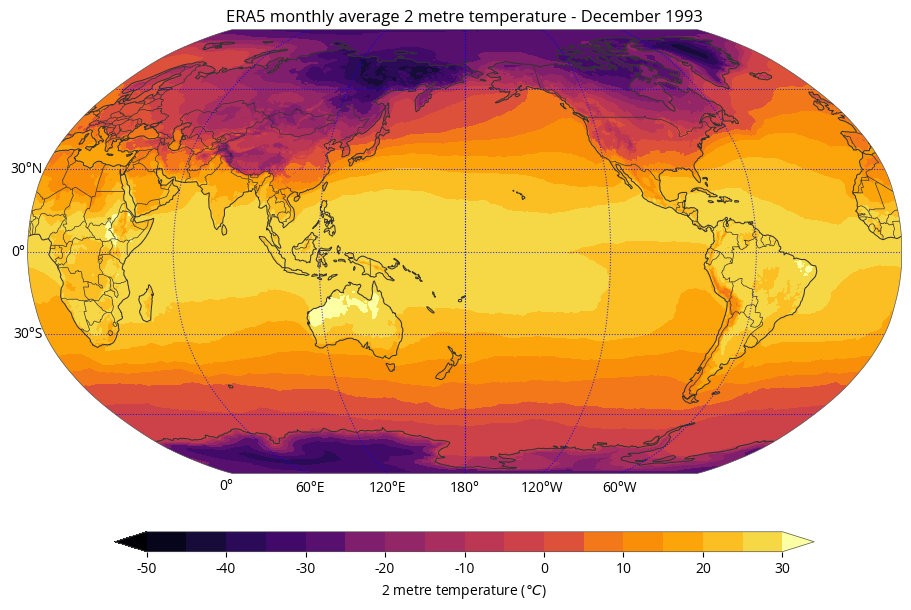

In [7]:
# Create a Robinson CRS (Coordinate Reference System) centred on 180°E
import cartopy.crs as ccrs  # the source of our Robinson projection
crs = ccrs.Robinson(central_longitude=180)

# Create our Chart using the Robinson CRS defined above
chart = earthkit.maps.Chart(crs=crs)

# Plot the data using the Style we created earlier
chart.plot(data, style=style)

# Add thicker-than-usual coastlines, solid borders and blue gridlines
chart.coastlines(linewidth=0.75)
chart.borders(linestyle="solid")
chart.gridlines(color="blue")

# Add a title using format strings which detect metadata
# Note that times can be formatted using standard datetime format codes - in
# this case the long month name (%B) and the year (%Y)
chart.subplot_titles("ERA5 monthly average {variable_name} - {time:%B %Y}")

chart.legend()

chart.show()